In [8]:
%cd ../

C:\Users\amena\OneDrive\Bureau\demo_cerebrra


In [10]:
import mediapipe as mp 
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [73]:
list_img=[]
for img_name in os.listdir("./test_img"):
    list_img.append(
        os.path.join(os.getcwd(),'/test_img', img_name)
    )
print(list_img)

['C:/test_img\\10259172_1666643040279726_4727929446229385879_o.jpg', 'C:/test_img\\11221640_1653455341598496_4768462622820545103_n.jpg', 'C:/test_img\\17309567_1879180442359317_3705449250180461443_n.jpg', 'C:/test_img\\204941193_541127926903264_2832057020508350740_n.jpg']


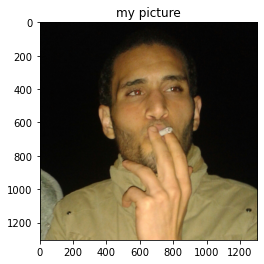

In [78]:
img = cv2.imread('test_img/10259172_1666643040279726_4727929446229385879_o.jpg')
RGB_IMG = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_IMG)
plt.title('my picture')
plt.show()


In [79]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
help(mp_face_detection.FaceDetection)

Help on class FaceDetection in module mediapipe.python.solutions.face_detection:

class FaceDetection(mediapipe.python.solution_base.SolutionBase)
 |  FaceDetection(min_detection_confidence=0.5, model_selection=0)
 |  
 |  MediaPipe Face Detection.
 |  
 |  MediaPipe Face Detection processes an RGB image and returns a list of the
 |  detected face location data.
 |  
 |  Please refer to
 |  https://solutions.mediapipe.dev/face_detection#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceDetection
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, min_detection_confidence=0.5, model_selection=0)
 |      Initializes a MediaPipe Face Detection object.
 |      
 |      Args:
 |        min_detection_confidence: Minimum confidence value ([0.0, 1.0]) for face
 |          detection to be considered successful. See details in
 |          https://solutions.mediapipe.dev/face_det

In [80]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of :
[label_id: 0
score: 0.88989484
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.30728772
    ymin: 0.23007475
    width: 0.38469943
    height: 0.38494837
  }
  relative_keypoints {
    x: 0.43303773
    y: 0.32942194
  }
  relative_keypoints {
    x: 0.6014218
    y: 0.31647763
  }
  relative_keypoints {
    x: 0.54282415
    y: 0.40767214
  }
  relative_keypoints {
    x: 0.5424746
    y: 0.49743715
  }
  relative_keypoints {
    x: 0.31701815
    y: 0.3869656
  }
  relative_keypoints {
    x: 0.6667951
    y: 0.35700738
  }
}
]


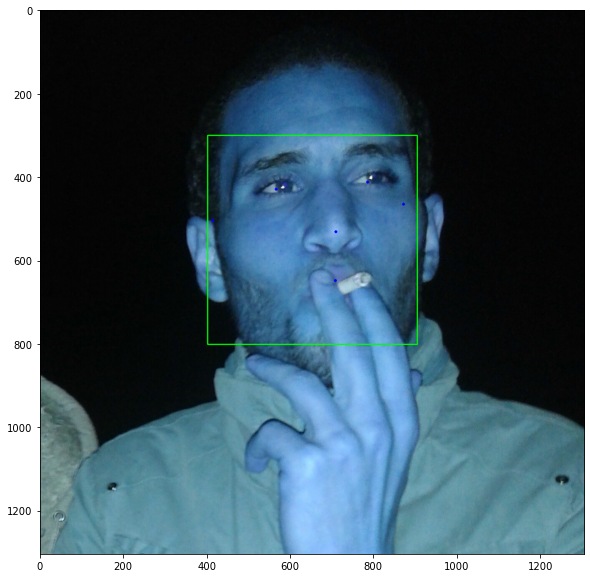

In [92]:
fig= plt.figure(figsize=(10,10))
with mp_face_detection.FaceDetection(min_detection_confidence=0.5, 
                                     model_selection=0) as face_detection:
    img = cv2.imread('test_img/10259172_1666643040279726_4727929446229385879_o.jpg')
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(img,
                                                  cv2.COLOR_BGR2RGB))
    # Draw face detections of each face.
    print(f'Face detections of :')
    BGR_annotated_image = img.copy()
    for detection in results.detections:
        mp_drawing.draw_detection(BGR_annotated_image, detection)
        print(results.detections)
        plt.imshow(BGR_annotated_image)
        

In [94]:
img.shape

(1304, 1305, 3)

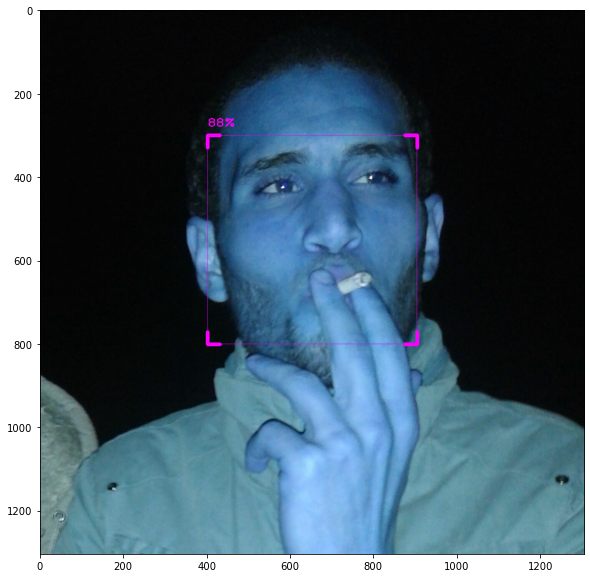

In [101]:

fig= plt.figure(figsize=(10,10))

normalized_bbox = detection.location_data.relative_bounding_box
image_height, image_width, _ = img.shape

x = int(normalized_bbox.xmin * image_width)
y= int(normalized_bbox.ymin * image_height)
w = int(normalized_bbox.width * image_width)
h= int(normalized_bbox.height * image_height)

bbox = x, y, w, h

RESCALED_relative_bounding_box {
    xmin: x
    ymin: y
    width: w
    height: h
  }

x1, y1 = x + w, y + h
plt.imshow(
cv2.rectangle(img, bbox, (225,0,255),1))